In [1]:
import os

# 获取当前工作目录

current_directory = os.getcwd()

print("当前工作目录:", current_directory)

当前工作目录: D:\Data\Shap


In [2]:
import pandas as pd
          
import numpy as np

import matplotlib.pyplot as plt
          
from sklearn.model_selection import train_test_split   

In [3]:
# 设置字体为新罗马数字
plt.rcParams['font.family'] = 'Times New Roman'

# 处理负号          
plt.rcParams['axes.unicode_minus'] = False

# 忽略警告
import warnings
          
warnings.filterwarnings("ignore")

In [4]:
# 读取数据

df = pd.read_csv('Data_target.csv')

# 删除 NaN 值

df.dropna(inplace=True)

# 检查是否还存在缺失值 print(df.isnull().sum())

In [5]:
# 划分特征和目标变量 

# 删除 'target' 列

X = df.drop(['Target'], axis=1)        

# 获取 'target' 列作为目标变量

y = df['Target']  

In [6]:
# 划分训练集和测试集      
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df['Target'])
# 观察前几行
df.head()

Size  DOI     TT  TB  BASO%   NLR  Grade   PNI  LVI  Target
0    15  0.2  10.61   1    0.8  2.23       2    0    0       0
1    30  0.3  12.30   1    0.9  2.56       2    1    0       0
2    15  0.4  13.71  29    0.5  3.82       2    1    0       1
3     5  0.5   4.10   7    0.5  2.65       1    0    0       0
4    18  0.6   6.52   2    0.7  0.81       2    0    0       1

In [7]:
# 加载相关包 

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

# GBT模型参数

params_gbt = {    
    'learning_rate': 0.02,            # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1
    
    'max_depth': 3,                   # 树的深度，控制模型复杂度    
    
    'random_state': 42,               # 随机种子，用于重现模型的结果   
    
    'subsample': 0.7,                 # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力
    
}

In [8]:
# 初始化Gradient Boosting分类模型

model_gbt = GradientBoostingClassifier(**params_gbt)

In [9]:
# 定义参数网格，用于网格搜索
param_grid = {    
    
    'n_estimators': [100, 200, 300],  # 树的数量    
    
    'max_depth': [3, 4, 5],               # 树的深度 
    
    'learning_rate': [0.01, 0.1],   # 学习率
    
}

In [10]:
# 使用GridSearchCV进行网格搜索和k折交叉验证
grid_search = GridSearchCV(    
    
    estimator=model_gbt,    
    
    param_grid=param_grid,    
    
    scoring='neg_log_loss',  # 评价指标为负对数损失   
    
    cv=5,                    # 5折交叉验证    
    
    n_jobs=-1,               # 并行计算    
    
    verbose=1                # 输出详细进度信息
    
)

In [11]:
# 训练模型

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                  random_state=42,
                                                  subsample=0.7),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_log_loss', verbose=1)

In [12]:
# 使用最优参数训练模型

best_model = grid_search.best_estimator_

In [13]:
import shap

explainer = shap.TreeExplainer(best_model)

# 计算shap值为numpy.array数组

shap_values_numpy = explainer.shap_values(X)

# 计算shap值为Explanation格式

shap_values_Explanation = explainer(X)

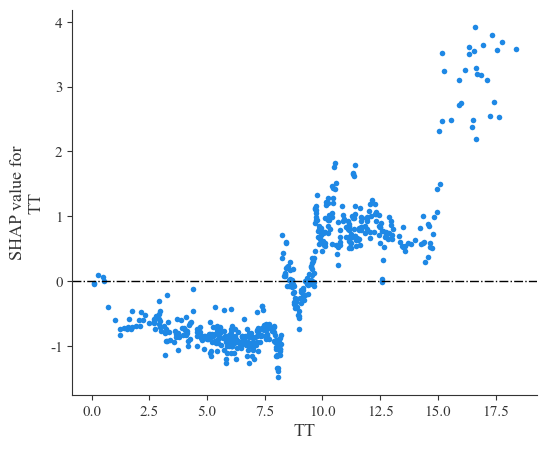

In [15]:
# 绘制 'age' 特征的 SHAP 依赖图，不显示颜色条

shap.dependence_plot('TT', shap_values_Explanation.values, X, interaction_index=None, show=False)

# 添加 SHAP=0 的横线

plt.axhline(y=0, color='black', linestyle='-.', linewidth=1)

plt.show()

In [16]:
# 将 SHAP 值转换为 DataFrame 格式以便于自定义绘图

shap_values_df = pd.DataFrame(shap_values_numpy, columns=X.columns)

shap_values_df.head()

Size       DOI        TT        TB     BASO%       NLR    Grade   \
0 -0.107424  0.251418  0.419457 -0.830150 -0.206027  0.211443  0.031128   
1  0.482150 -0.413722  1.069410 -0.612507 -0.296257  0.137103  0.084449   
2  0.174467 -0.262884  0.591137  2.519042  0.323299  0.559369  0.054410   
3 -0.527713  0.767321 -0.554373 -0.803038  0.440007 -0.365699 -0.183722   
4  1.288148  1.323401 -0.857885 -0.304208  0.053232  1.059783  0.139903   

        PNI       LVI  
0 -0.194469 -0.050375  
1  0.824786 -0.051778  
2  0.611627 -0.033876  
3 -0.168756 -0.070908  
4 -0.164111 -0.071984

In [17]:
print(shap_values_df)

         Size       DOI        TT        TB     BASO%       NLR    Grade   \
0   -0.107424  0.251418  0.419457 -0.830150 -0.206027  0.211443  0.031128   
1    0.482150 -0.413722  1.069410 -0.612507 -0.296257  0.137103  0.084449   
2    0.174467 -0.262884  0.591137  2.519042  0.323299  0.559369  0.054410   
3   -0.527713  0.767321 -0.554373 -0.803038  0.440007 -0.365699 -0.183722   
4    1.288148  1.323401 -0.857885 -0.304208  0.053232  1.059783  0.139903   
..        ...       ...       ...       ...       ...       ...       ...   
549  0.476145  1.095379 -0.720282  2.961453  0.136398  0.955426 -0.213014   
550  0.153062  0.097325 -0.737599 -0.701233 -0.387095 -0.365600 -0.366906   
551  1.788456  0.717957  0.039391 -0.344571  0.292733  0.569939  0.041945   
552  0.820496  0.979248  0.850685 -1.338002  0.299301  0.413497  0.043482   
553  0.211722  0.378707 -1.056963  0.468480 -0.409484  0.207198 -0.371496   

          PNI       LVI  
0   -0.194469 -0.050375  
1    0.824786 -0.051778

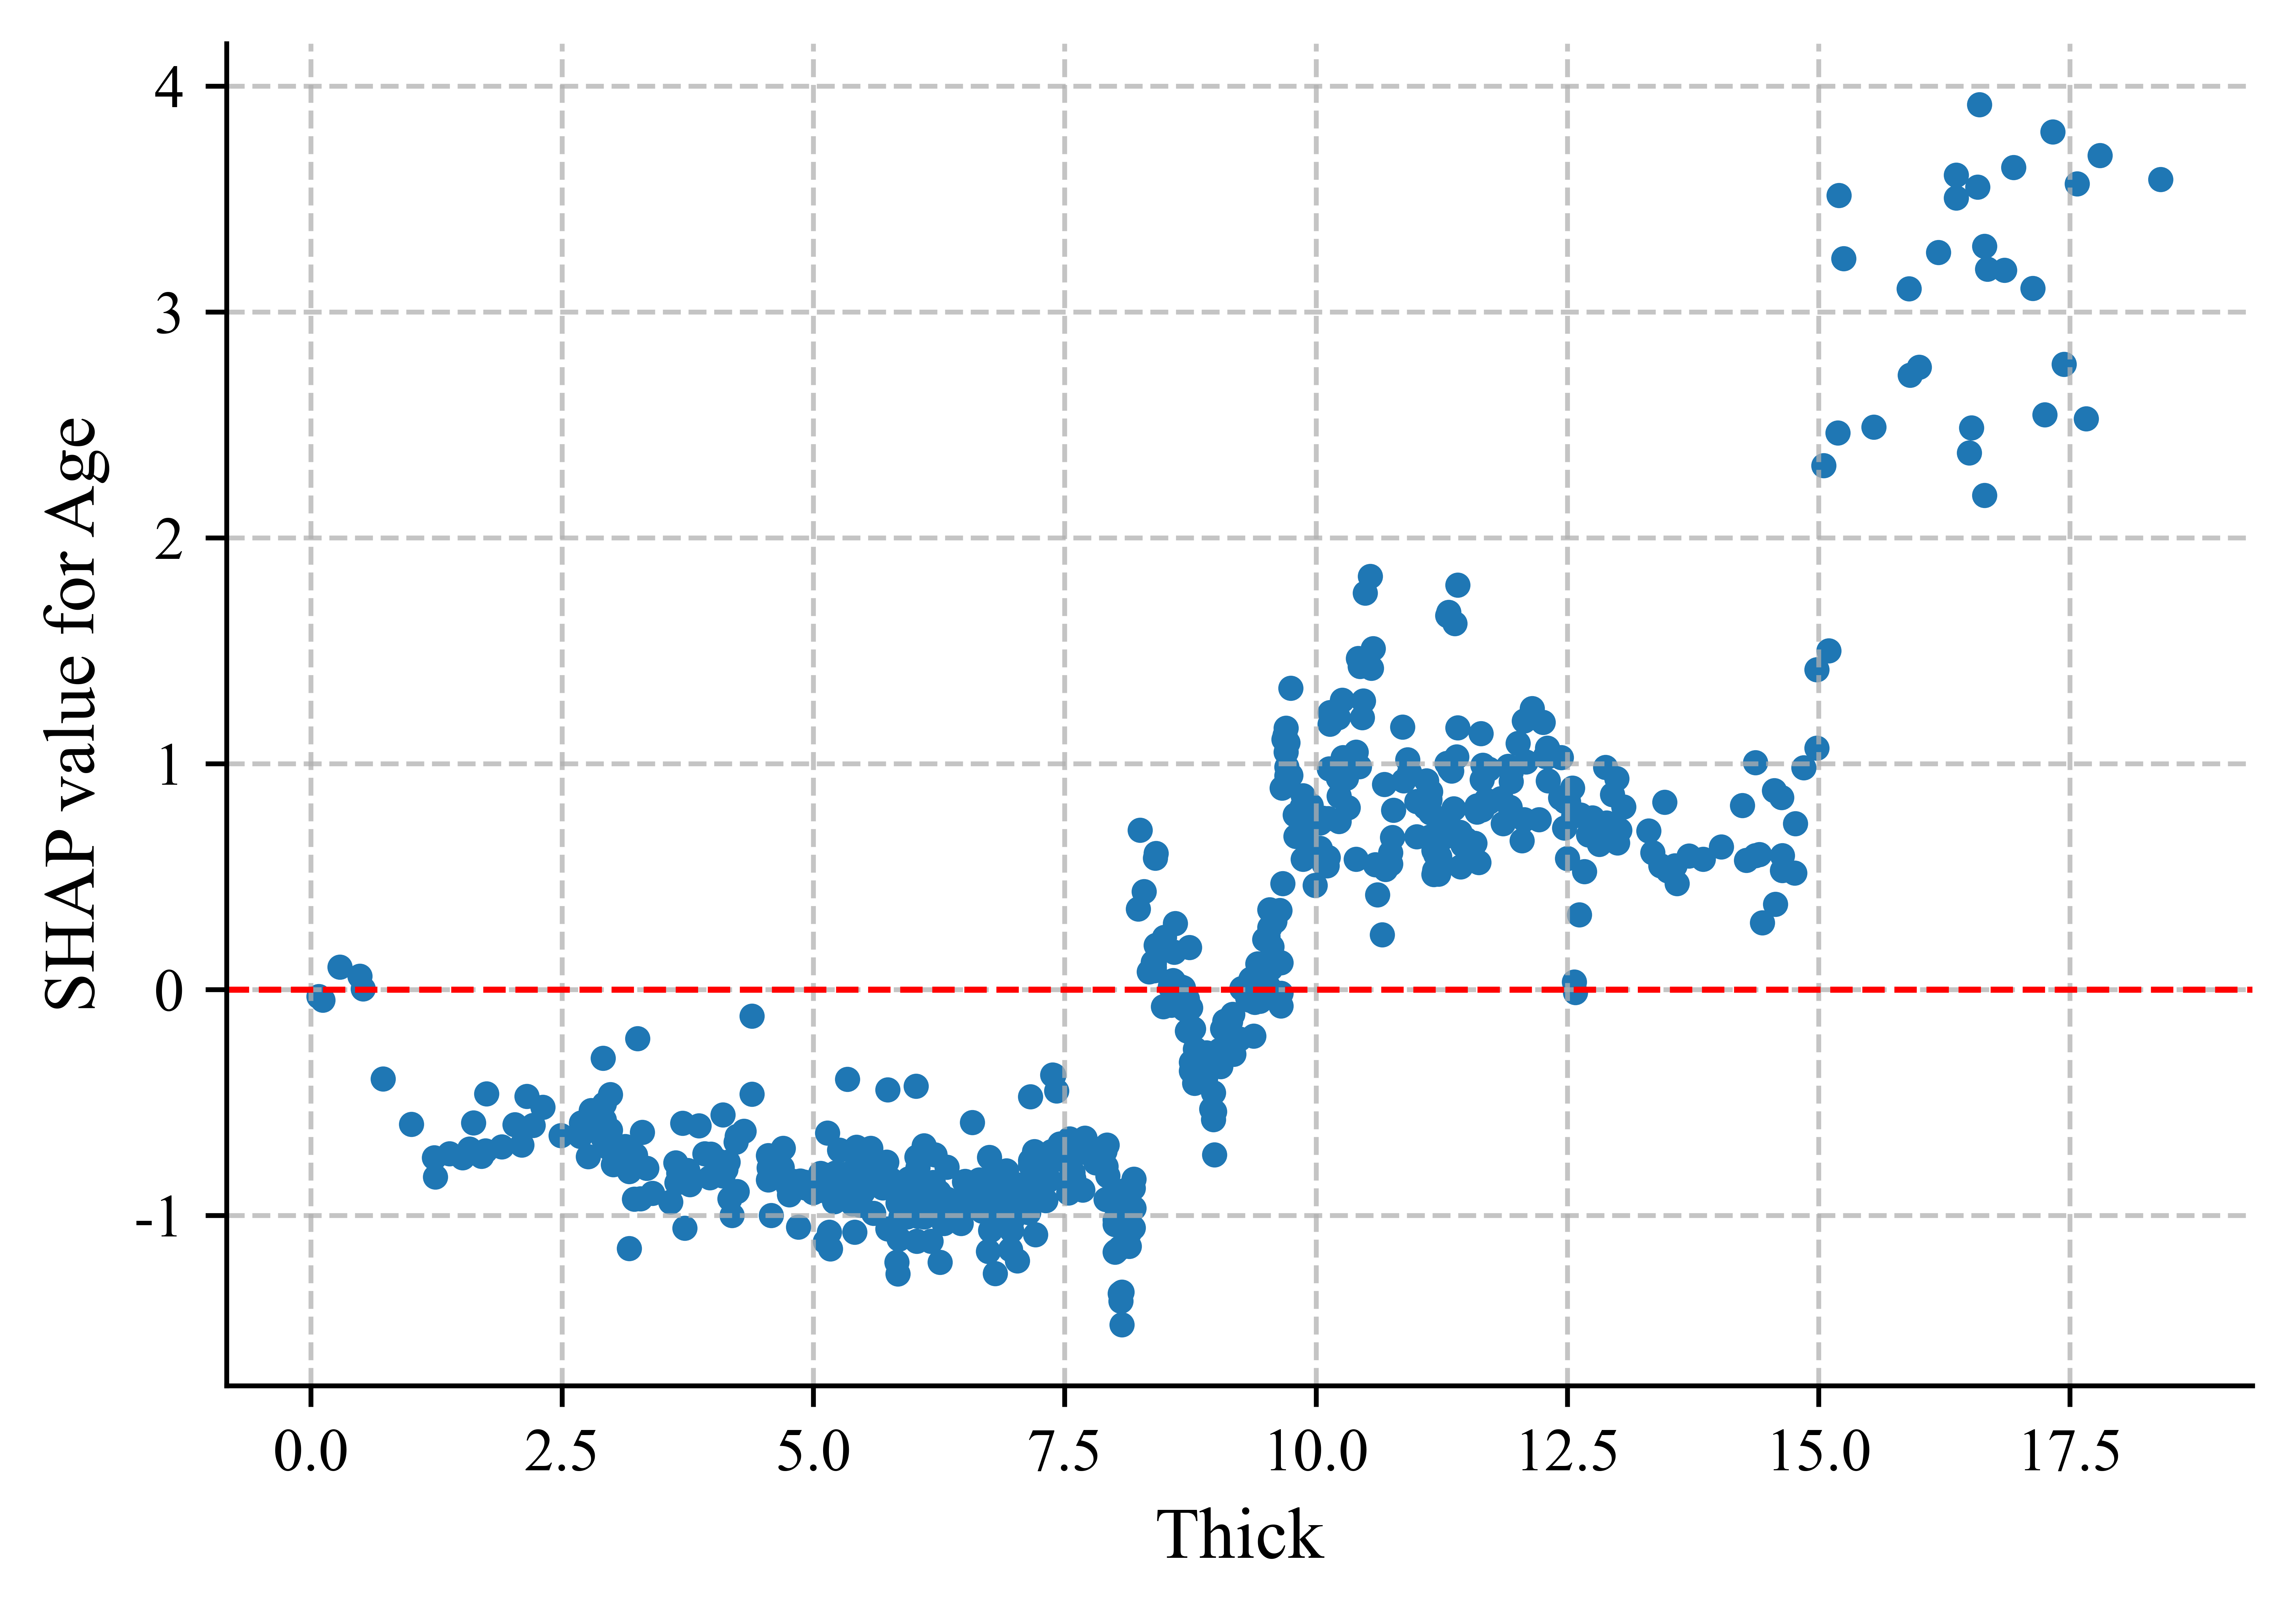

In [20]:
# 绘制散点图，x轴是'age'特征，y轴是SHAP值

plt.figure(figsize=(6, 4),dpi=1200)

plt.scatter(df['TT'], shap_values_df['TT'], s=10)

# 开启网格线

plt.grid(visible=True, linestyle='--', alpha=0.75) 

# 添加shap=0的横线

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.xlabel('Thick', fontsize=12)

plt.ylabel('SHAP value for Age', fontsize=12) 

ax = plt.gca()

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

In [22]:
import matplotlib.pyplot as plt

# 定义绘制 SHAP 依赖图的函数
def plot_shap_dependence(feature_list, df, shap_values_df, file_name="SHAP_Depend_Plots.pdf"):  
    fig, axs = plt.subplots(2, 3, figsize=(12,8), dpi=1200) 
    plt.subplots_adjust(hspace=0.4, wspace=0.4)        

    # 循环绘制每个特征的 SHAP 依赖图    
    for i, feature in enumerate(feature_list):  
        row = i // 3  # 行号    
        col = i % 3   # 列号    
        ax = axs[row, col]                

        # 绘制散点图，x轴是特征值，y轴是SHAP值 
        ax.scatter(df[feature], shap_values_df[feature], s=10)   

        # 添加shap=0的横线  
        ax.axhline(y=0, color='red', linestyle='--', linewidth=1)   
      
        # 设置x和y轴标签     
        ax.set_xlabel(feature, fontsize=12) 
        ax.set_ylabel(f'SHAP value for {feature}', fontsize=12)                
        
        # 隐藏顶部和右侧的脊柱  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)    
        
        # 添加网格线
        ax.grid(True, linestyle='--', alpha=0.75)  

    # 设置标题
    plt.suptitle("", fontsize=14, fontweight='bold') 
    
    # 保存图像为 PDF 文件
# 保存图像为 PDF 文件
    plt.savefig(file_name, format='pdf', bbox_inches='tight') 

    plt.show()

# 使用函数绘制特征的 SHAP 依赖图

feature_list = ['TB', 'TT','BASO%','NLR', 'Size', 'DOI']

plot_shap_dependence(feature_list, df, shap_values_df)
